<a href="https://colab.research.google.com/github/ADiti16Sengar/ML-CHE/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
from google.colab import files
upload = files.upload()


Saving AirQualityUCI.xlsx to AirQualityUCI.xlsx


In [3]:
df = pd.read_excel('AirQualityUCI.xlsx')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [4]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.2


In [5]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [6]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [7]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [8]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CO(GT),7486.0,-34.287617,77.709461,-200.0,0.600000,1.500000,2.600000,11.900000
PT08.S1(CO),7486.0,1046.133149,329.776504,-200.0,919.312500,1050.000000,1217.000000,2039.750000
NMHC(GT),7486.0,-158.690756,140.800954,-200.0,-200.000000,-200.000000,-200.000000,1189.000000
C6H6(GT),7486.0,1.717633,41.571093,-200.0,3.956504,7.838454,13.550494,52.054064
PT08.S2(NMHC),7486.0,891.833111,342.308541,-200.0,708.312500,892.500000,1101.937500,2006.750000
NOx(GT),7486.0,166.495632,256.082403,-200.0,49.000000,140.000000,282.000000,1479.000000
PT08.S3(NOx),7486.0,797.434723,324.819566,-200.0,639.250000,796.500000,961.500000,2682.750000
NO2(GT),7486.0,57.187390,127.138297,-200.0,53.000000,96.000000,132.000000,339.700000
PT08.S4(NO2),7486.0,1388.193906,467.731010,-200.0,1179.750000,1444.875000,1660.687500,2775.000000
PT08.S5(O3),7486.0,970.547990,456.646734,-200.0,696.750000,939.750000,1246.187500,2522.750000


In [9]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('RH')
test_labels = test_features.pop('RH')

In [10]:
train_features=train_features.drop(['Time','Date'], axis=1)




In [11]:
train_features

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
1121,1.3,916.50,101,5.171480,772.00,98.0,1097.75,78.0,1311.25,604.50,18.825000,0.682075
8028,0.6,918.00,-200,1.579374,551.25,114.2,1062.25,91.6,817.25,712.00,6.075000,0.412884
3803,0.4,765.75,-200,2.448274,616.00,43.0,1163.25,43.0,1306.00,529.75,21.500000,1.155817
4595,0.5,774.75,-200,2.346608,609.00,58.0,1318.50,42.0,1189.50,468.25,20.150000,1.089875
587,-200.0,1009.50,-200,2.967948,650.00,-200.0,1171.25,-200.0,1433.75,664.00,13.725000,1.039271
...,...,...,...,...,...,...,...,...,...,...,...,...
5122,-200.0,940.75,-200,3.559687,685.75,50.0,941.75,38.0,1405.75,548.50,22.775000,1.750711
4114,-200.0,904.00,-200,4.789679,752.75,-200.0,809.00,-200.0,1528.75,765.50,21.000000,1.645432
3813,0.8,825.25,-200,3.848126,702.25,53.0,1076.50,57.0,1267.25,458.00,38.400001,1.095729
7964,1.1,903.25,-200,3.733355,695.75,179.5,931.50,128.5,850.00,629.00,9.275000,0.387383


In [12]:
test_features

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,0.757754
19,2004-03-11,13:00:00,1.9,1285.50,63,7.269933,868.50,146.0,1162.25,112.0,1536.75,799.00,8.300,0.839268
21,2004-03-11,15:00:00,2.2,1310.00,79,8.826223,932.50,184.0,1081.75,126.0,1646.50,946.25,8.325,0.877784
25,2004-03-11,19:00:00,6.9,1775.50,461,27.359807,1487.75,383.0,702.25,172.0,2332.50,1704.00,9.650,0.831921
28,2004-03-11,22:00:00,1.5,964.50,61,4.707072,748.50,94.0,1325.25,85.0,1332.50,821.00,8.175,0.690484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,2005-04-03,11:00:00,1.3,999.75,-200,5.313402,779.00,171.3,804.50,115.0,1000.75,639.50,24.000,0.567283
9331,2005-04-03,13:00:00,1.0,928.00,-200,3.817080,700.50,118.7,925.75,86.4,902.00,455.50,28.675,0.530155
9341,2005-04-03,23:00:00,1.2,1099.75,-200,5.106145,768.75,170.1,721.75,127.6,1146.75,1049.00,14.275,0.849727
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,0.711864


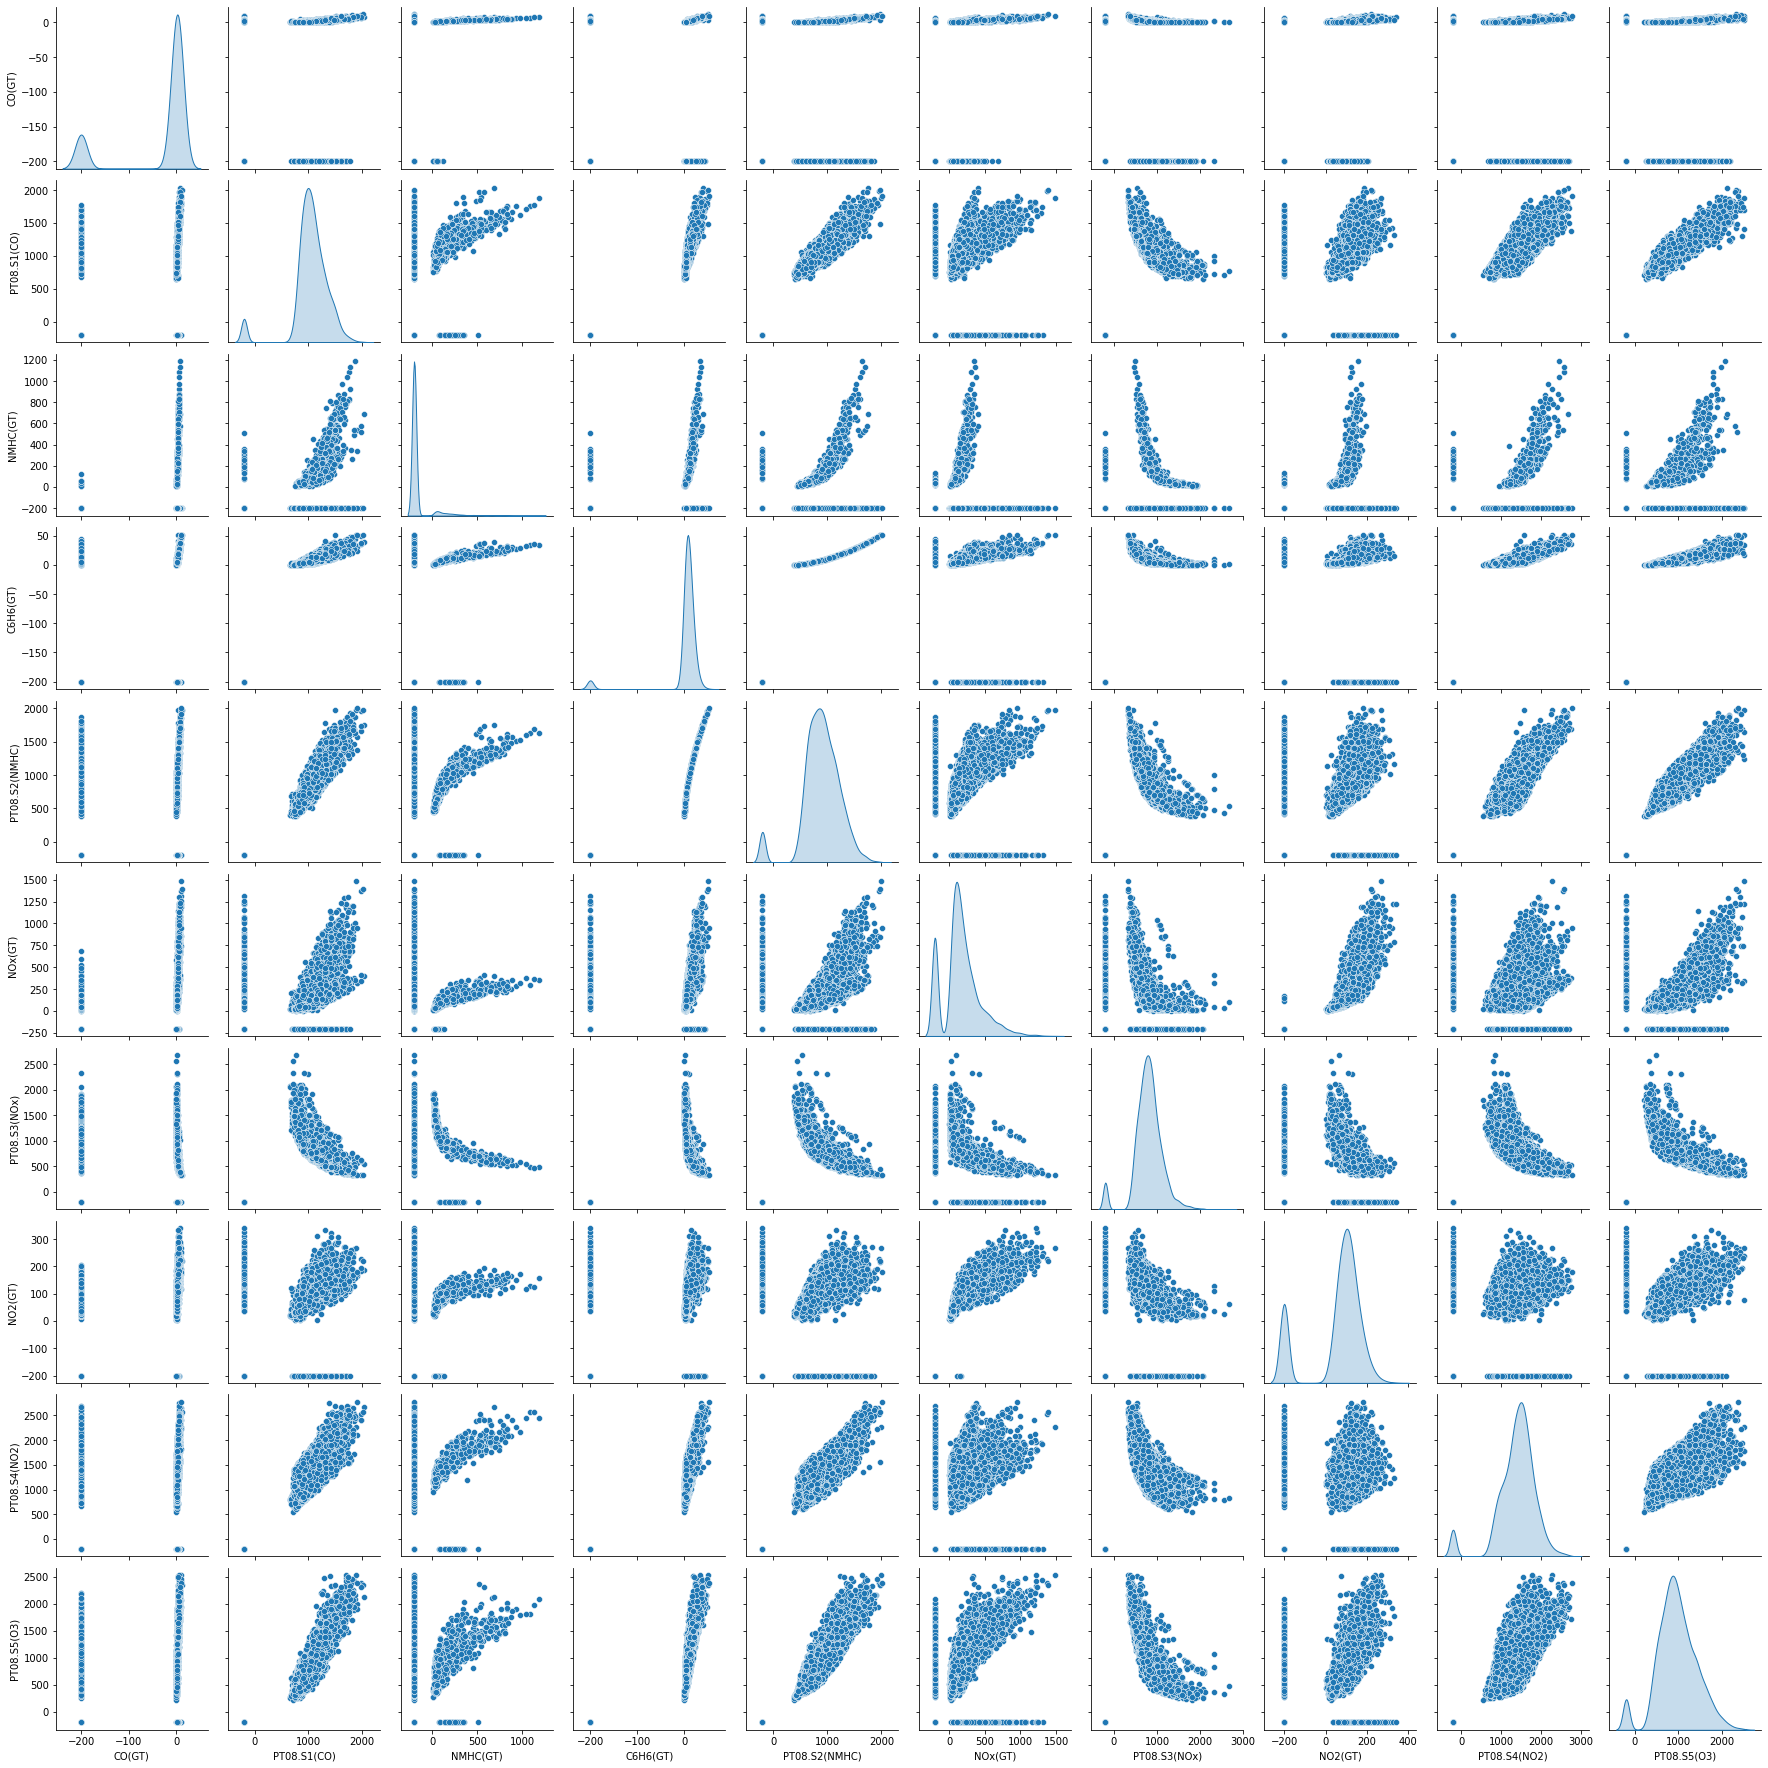

In [13]:
sns.pairplot(train_dataset[['CO(GT)', 'PT08.S1(CO)',	'NMHC(GT)',	'C6H6(GT)'	,'PT08.S2(NMHC)'	,'NOx(GT)',	'PT08.S3(NOx)',	'NO2(GT)'	,'PT08.S4(NO2)'	,'PT08.S5(O3)']], diag_kind='kde')

In [14]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [15]:
normalizer.adapt(train_features)

In [16]:
print(normalizer.mean.numpy())

[[ -34.28761   1046.1337    -158.6907       1.7176325  891.8333
   166.49565    797.43475     57.18742   1388.1943     970.54803
     9.702119    -6.924072 ]]


In [17]:
#Create a two-step Keras Sequential model again
# the first layer being normalizer (tf.keras.layers.Normalization(axis=-1))

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=10)
])


In [18]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 198ms/step


array([[ 0.10483297, -0.7744097 ,  0.80891377, -0.44627804, -0.8520041 ,
         0.28151354, -0.14470734, -0.3072681 ,  1.2759266 , -0.367117  ],
       [ 0.9142305 ,  0.49391657, -0.12990032,  0.03800643, -0.47454357,
        -0.58039767,  0.35738668,  0.08972787,  0.28296253,  0.5266615 ],
       [ 0.8584237 , -0.21873838,  0.14736302, -0.18661304, -0.9167253 ,
        -0.9323684 ,  0.5299525 ,  0.561919  ,  0.3390667 ,  0.23296326],
       [ 0.96438503, -0.17096993,  0.3063703 , -0.13611662, -1.0522792 ,
        -0.96918625,  0.64441633,  0.38126075,  0.38330162,  0.37581843],
       [ 0.6755276 , -1.3336267 ,  2.352157  ,  0.91551024, -0.25058642,
        -0.35756642, -0.57306856,  1.7375752 , -0.30761886, -1.2118447 ],
       [-0.11336554,  0.29765895, -0.6993711 , -0.83839196,  0.64056915,
        -0.26806363,  0.708964  , -0.2909467 , -0.69562244,  0.06791325],
       [-0.45086503,  0.6282071 , -1.0452006 , -0.1349728 ,  0.5182027 ,
         0.03054657,  0.00444392, -1.5765165 

In [19]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [20]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
188/188 [==============================] - 2s 7ms/step - loss: 35.1140 - val_loss: 23.7826
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 18.9572 - val_loss: 15.0474
Epoch 3/100
188/188 [==============================] - 0s 3ms/step - loss: 13.9563 - val_loss: 12.7913
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 12.6822 - val_loss: 12.1120
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 12.0061 - val_loss: 11.4288
Epoch 6/100
188/188 [==============================] - 1s 3ms/step - loss: 11.3846 - val_loss: 10.9254
Epoch 7/100
188/188 [==============================] - 1s 3ms/step - loss: 10.8759 - val_loss: 10.4142
Epoch 8/100
188/188 [==============================] - 1s 3ms/step - loss: 10.3904 - val_loss: 10.0511
Epoch 9/100
188/188 [==============================] - 1s 3ms/step - loss: 9.9717 - val_loss: 9.5509
Epoch 10/100
188/188 [==============================] - 0s 2ms/step - loss:

In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,6.363847,6.121019,95
96,6.359631,6.125190,96
97,6.365293,6.168553,97
98,6.374796,6.177443,98
99,6.418016,6.107253,99


In [29]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

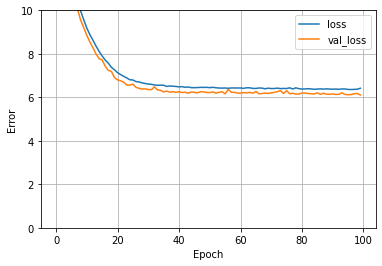

In [30]:
plot_loss(history)

In [31]:
test_results={}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=1)

ValueError: ignored

In [22]:
### model 2
model = keras.Sequential([
      normalizer,
      layers.Dense(units=64),
      layers.Dense(units=64),
      layers.Dense(units=1)
  ])



In [24]:
model.predict(train_features[:10])

1/1 [==============================] - 0s 76ms/step


array([[ 0.36736727],
       [ 0.12169296],
       [ 0.11696559],
       [ 0.08607168],
       [ 0.2491154 ],
       [-0.3067344 ],
       [-0.45293704],
       [-0.25719297],
       [ 0.38300532],
       [-0.24171066]], dtype=float32)

In [25]:
model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001))

In [26]:
%%time
history_a= model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: 33.9065 - val_loss: 14.5609
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 13.5342 - val_loss: 12.2067
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 11.5119 - val_loss: 10.3078
Epoch 4/100
188/188 [==============================] - 0s 3ms/step - loss: 9.8840 - val_loss: 9.0564
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 8.5843 - val_loss: 7.8123
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 7.6350 - val_loss: 7.1555
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: 7.1038 - val_loss: 6.8128
Epoch 8/100
188/188 [==============================] - 0s 2ms/step - loss: 6.9225 - val_loss: 6.7552
Epoch 9/100
188/188 [==============================] - 0s 2ms/step - loss: 6.7549 - val_loss: 6.6350
Epoch 10/100
188/188 [==============================] - 0s 2ms/step - loss: 6.7202 - 

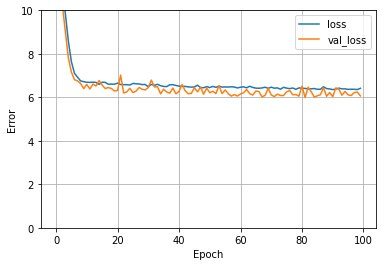

In [32]:
plot_loss(history_a)

In [33]:
model_b = keras.Sequential([
      normalizer,
      layers.Dense(units=100),
      layers.Dense(units=100),
      layers.Dense(units=100),
      layers.Dense(units=1)
  ])

In [34]:
model_b.predict(train_features[:10])

1/1 [==============================] - 0s 231ms/step


array([[-1.3000985 ],
       [-0.35603508],
       [-0.21626978],
       [-0.35178056],
       [-0.76727945],
       [ 0.3018155 ],
       [ 0.5296397 ],
       [ 0.22084346],
       [-1.4300283 ],
       [-0.6425359 ]], dtype=float32)

In [35]:
model_b.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [36]:
history_b= model_b.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: 22.7632 - val_loss: 10.8346
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 9.1651 - val_loss: 7.4207
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 7.3309 - val_loss: 6.9190
Epoch 4/100
188/188 [==============================] - 0s 3ms/step - loss: 7.1891 - val_loss: 6.3681
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 7.0684 - val_loss: 6.7468
Epoch 6/100
188/188 [==============================] - 1s 3ms/step - loss: 6.9086 - val_loss: 6.2582
Epoch 7/100
188/188 [==============================] - 1s 3ms/step - loss: 6.8069 - val_loss: 6.6453
Epoch 8/100
188/188 [==============================] - 1s 3ms/step - loss: 6.8603 - val_loss: 6.7386
Epoch 9/100
188/188 [==============================] - 1s 3ms/step - loss: 6.8800 - val_loss: 6.4988
Epoch 10/100
188/188 [==============================] - 1s 3ms/step - loss: 6.7959 - val_

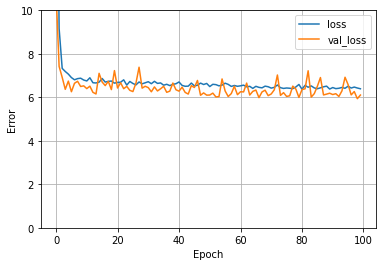

In [37]:
plot_loss(history_b)

In [38]:
model_c = keras.Sequential([
      normalizer,
      layers.Dense(units=200),
      layers.Dense(units=200),
      layers.Dense(units=100),
      layers.Dense(units=100),
      layers.Dense(units=64),
      layers.Dense(units=1)
  ])

In [39]:
model_c.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [40]:
history_c= model_c.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
188/188 [==============================] - 2s 4ms/step - loss: 16.5681 - val_loss: 8.2901
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 8.7248 - val_loss: 7.9216
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 7.5242 - val_loss: 7.0592
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 7.7037 - val_loss: 6.8084
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 7.1195 - val_loss: 6.8308
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 7.2669 - val_loss: 6.6714
Epoch 7/100
188/188 [==============================] - 1s 6ms/step - loss: 7.2031 - val_loss: 7.2115
Epoch 8/100
188/188 [==============================] - 1s 5ms/step - loss: 7.3295 - val_loss: 6.6417
Epoch 9/100
188/188 [==============================] - 1s 4ms/step - loss: 7.0104 - val_loss: 6.7212
Epoch 10/100
188/188 [==============================] - 1s 3ms/step - loss: 6.9688 - val_l

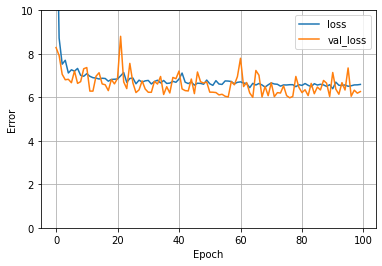

In [41]:
plot_loss(history_c)

In [48]:
model_d = keras.Sequential([
      normalizer,
      layers.Dense(units=800),
      layers.Dense(units=800),
      layers.Dense(units=500),
      layers.Dense(units=800),
      layers.Dense(units=800),
      layers.Dense(units=1)
  ])

In [49]:
model_d.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [50]:
history_d= model_d.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
188/188 [==============================] - 6s 26ms/step - loss: 15.4128 - val_loss: 7.5273
Epoch 2/100
188/188 [==============================] - 4s 23ms/step - loss: 8.4119 - val_loss: 12.9477
Epoch 3/100
188/188 [==============================] - 5s 29ms/step - loss: 8.7584 - val_loss: 7.7474
Epoch 4/100
188/188 [==============================] - 4s 23ms/step - loss: 7.6524 - val_loss: 7.5878
Epoch 5/100
188/188 [==============================] - 4s 23ms/step - loss: 7.7155 - val_loss: 7.9572
Epoch 6/100
188/188 [==============================] - 5s 29ms/step - loss: 7.4719 - val_loss: 7.9067
Epoch 7/100
188/188 [==============================] - 4s 23ms/step - loss: 7.4432 - val_loss: 7.1358
Epoch 8/100
188/188 [==============================] - 5s 24ms/step - loss: 7.3136 - val_loss: 6.6588
Epoch 9/100
188/188 [==============================] - 5s 28ms/step - loss: 7.6666 - val_loss: 7.0144
Epoch 10/100
188/188 [==============================] - 4s 23ms/step - loss: 7.2

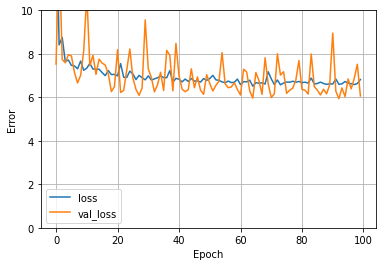

In [51]:
plot_loss(history_d)